<a href="https://colab.research.google.com/github/himanshuv62/-Exploratory-Data-Analysis-project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - *Yes Bank Stock Closing Price Prediction*



##### **Project Type**    - Regression
##### **Contribution**    - Individual/Team


# **Project Summary -**

For this project, we have chosen yes bank stock price data and we have analyzed closing price and this data contains monthly record and there was no missing value and also no duplicate and in this data set has variables open high low and close we have analyzed all of them and we have understood the relationship between the variables and visualize them and we have chosen root mean square error, mean square error evaluation metric for our prediction and for the forcasting we have choisen two model fist one was ARIMA and second was SARIMA

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,mean_absolute_error
import itertools


### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv("/content/data_YesBank_StockPrices.csv")

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

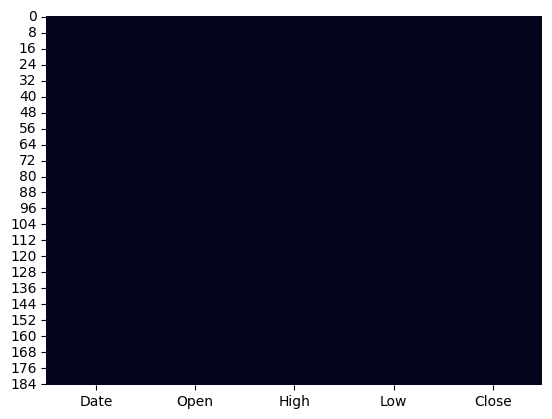

In [8]:
# Visualizing the missing values
sns.heatmap(data.isnull(),cbar = False)


### What did you know about your dataset?

The dataset given is a dataset from Indian financial domain and This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month and there are 4 columns in this data set. and this dataset has 185 rows and 5 columns and this dataset has no missing value.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* **Date** - month of the candles
* **Open** - opening price of the month
* **Hight** - highest price of the month
* **Low** - lowest price of the month
* **close**- closing price of the month

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in data.columns:
  print("No. of unique values in ",i,"is",data[i].nunique())

No. of unique values in  Date is 185
No. of unique values in  Open is 183
No. of unique values in  High is 184
No. of unique values in  Low is 183
No. of unique values in  Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
#Data Inspection
print(data.head())
print(data.info())
print(data.describe())


     Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
None
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.55000

In [13]:
#Data Cleaning
print(data.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


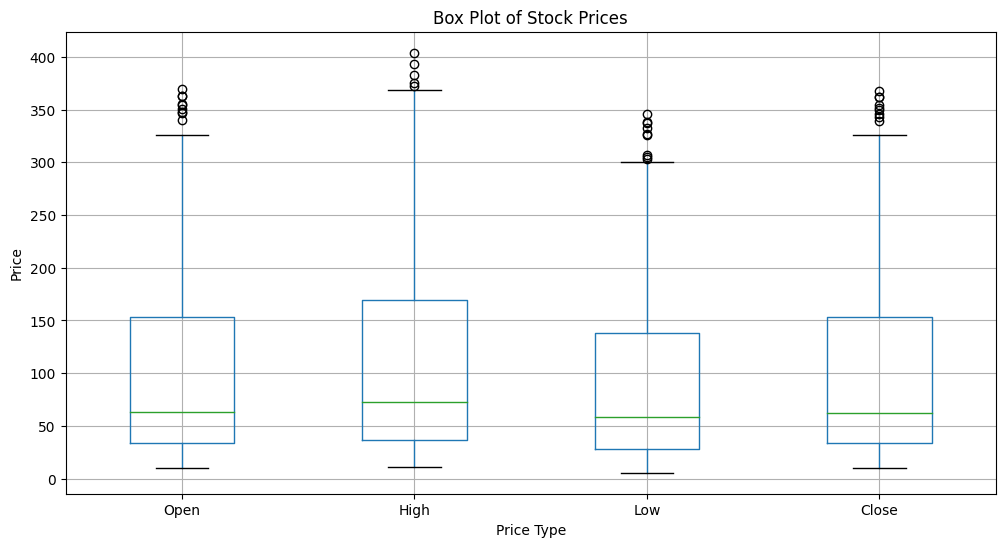

In [14]:
# visualize Outliers
plt.figure(figsize=(12, 6))
data[['Open', 'High', 'Low', 'Close']].boxplot()
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Box Plot of Stock Prices')
plt.grid(True)
plt.show()

In [15]:
#Set the Date column as index

data.set_index('Date',inplace = True)

### What all manipulations have you done and insights you found?

 'Date' column has been moved to the index position, and it is no longer a column in the DataFrame.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

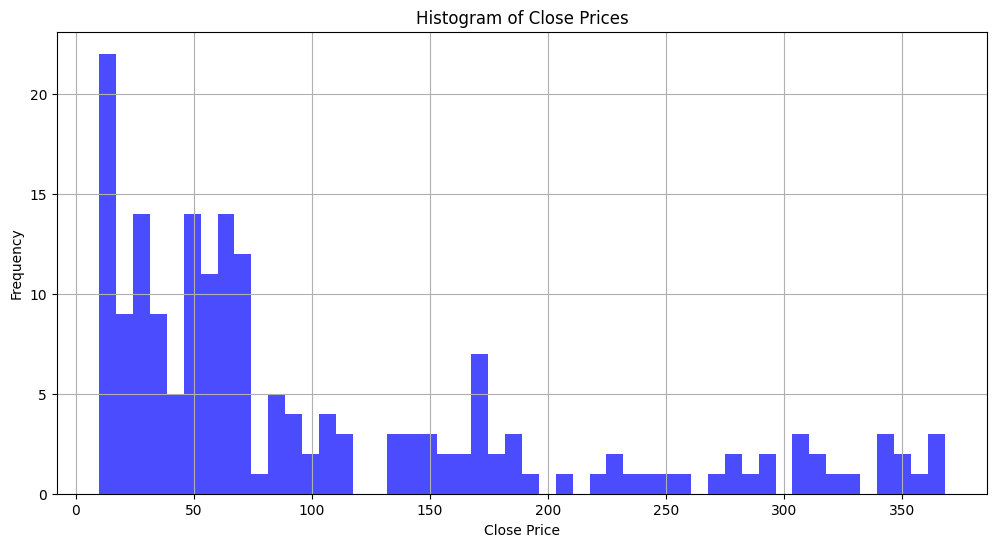

In [16]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 6))
plt.hist(data['Close'], bins=50, color='b', alpha=0.7)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Prices')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

They show the frequency of data points within specified intervals (bins), making it easy to see how data is spread across different ranges.

##### 2. What is/are the insight(s) found from the chart?

Most of the close prices are concentrated between 0 and 100, with the highest frequency occurring at the lower end of this range.
There are several noticeable peaks, particularly around the ranges of 0-20, 40-60, and 150-200. Close prices above 200 are relatively rare, suggesting that such high prices are infrequent in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


In this chart we can see the closing price of the stock is very low between 200 to 350

#### Chart - 2

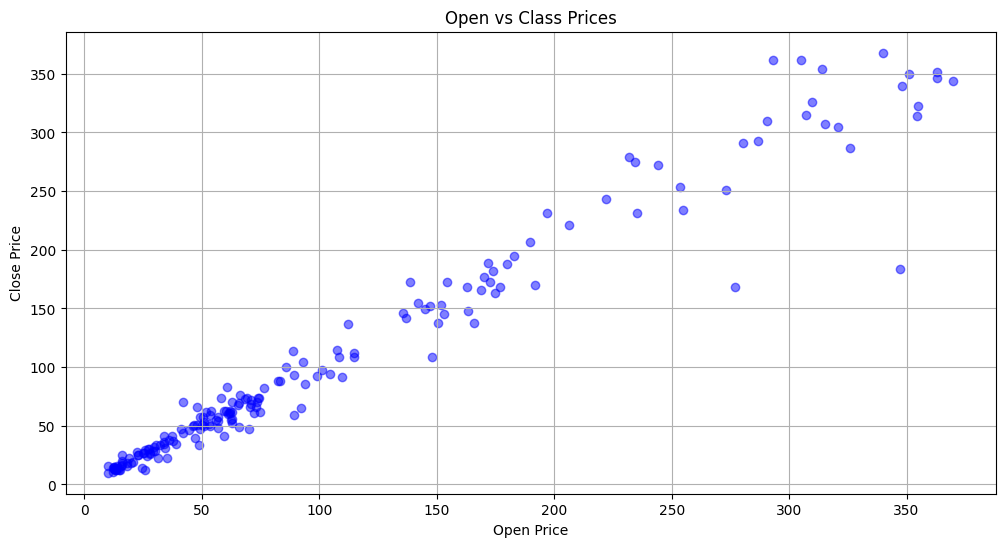

In [17]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
plt.scatter(data['Open'], data['Close'], color='b', alpha=0.5)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Class Prices')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Identifying relationships and correlations between two variables.
Detecting outliers and anomalies in data.
Visualizing the distribution and density of data points.
Recognizing patterns such as clusters or groupings.
Providing a simple, intuitive representation of data without assumptions.
Being easy to interpret and understand, making them useful in data analysis and communication.

##### 2. What is/are the insight(s) found from the chart?

In this chart we see that the maximum opening price is between 100 to 150 and the maximum closing price is between 100 to 150.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the chart we can see that the stock price is rising at a good pace from 100 to around 350

#### Chart - 3

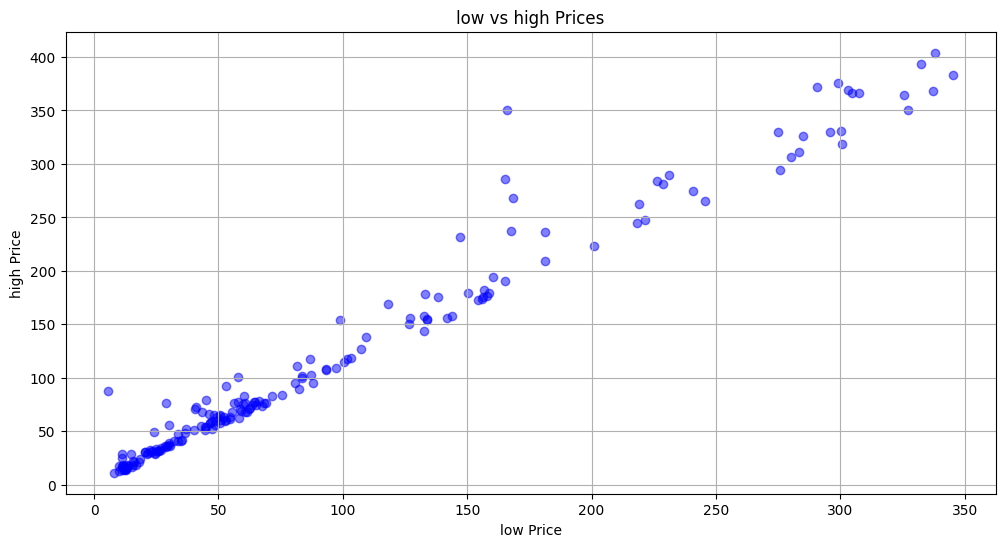

In [18]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
plt.scatter(data['Low'], data['High'], color='b', alpha=0.5)
plt.xlabel('low Price')
plt.ylabel('high Price')
plt.title('low vs high Prices')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Identifying relationships and correlations between two variables. Detecting outliers and anomalies in data. Visualizing the distribution and density of data points. Recognizing patterns such as clusters or groupings. Providing a simple, intuitive representation of data without assumptions. Being easy to interpret and understand, making them useful in data analysis and communication.

##### 2. What is/are the insight(s) found from the chart?

In the chart we can see that the high price and low price are very low on the upper side

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this chart we can see that lifetime high is around 400

#### Chart - 4

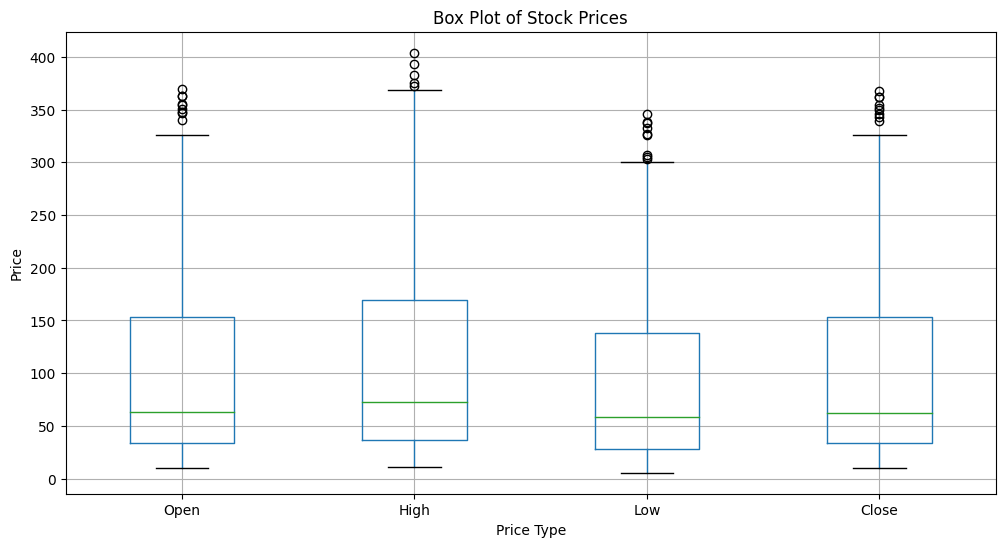

In [19]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
data[['Open', 'High', 'Low', 'Close']].boxplot()
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Box Plot of Stock Prices')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

 Bar plots are excellent for comparing quantities or values across different categories. The height or length of each bar directly represents the value it represents, allowing for easy visual comparison.

##### 2. What is/are the insight(s) found from the chart?

we can that mean of opening price around 105.54 and mean of high price around 116 and mean of low price around 94.94 and mean of close price around 105

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this chart we can see that the opening price and closing price are almost the same.

#### Chart - 5

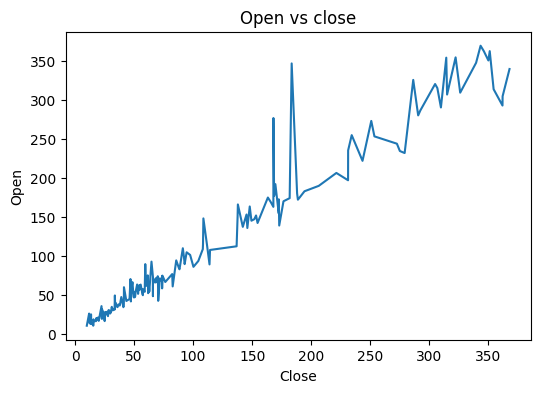

In [20]:
# Chart - 5 visualization code
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='Close', y='Open')
plt.title("Open vs close")
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are excellent for showing trends over time, such as changes in sales, temperature, stock prices, etc. They make it easy to identify upward, downward, or cyclical trends.

##### 2. What is/are the insight(s) found from the chart?

In this chart, we compare the stock's opening and closing prices.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

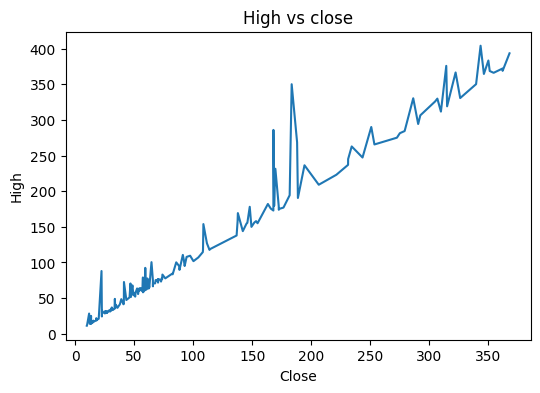

In [21]:
# Chart - 6 visualization code
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='Close', y='High')
plt.title("High vs close")
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are excellent for showing trends over time, such as changes in sales, temperature, stock prices, etc. They make it easy to identify upward, downward, or cyclical trends.

##### 2. What is/are the insight(s) found from the chart?

In this chart, we compare the stock's high and closing prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

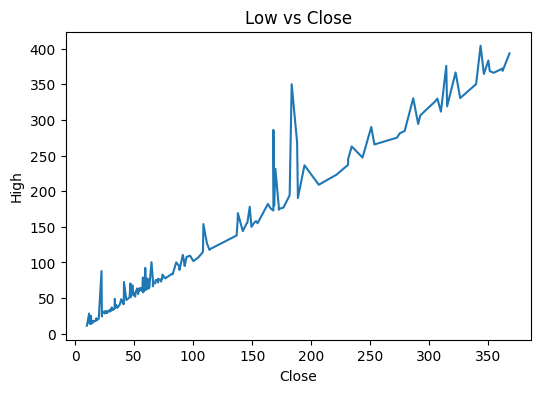

In [22]:
# Chart - 7 visualization code
plt.figure(figsize=(6,4))
sns.lineplot(data=data, x = 'Close',y='High')
plt.title('Low vs Close')
plt.show()


##### 1. Why did you pick the specific chart?

Line charts are excellent for showing trends over time, such as changes in sales, temperature, stock prices, etc. They make it easy to identify upward, downward, or cyclical trends.

##### 2. What is/are the insight(s) found from the chart?

In this chart, we compare the stock's Low and closing prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [23]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [24]:
# Chart - 9 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [25]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [26]:
# Chart - 11 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [27]:
# Chart - 12 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [28]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

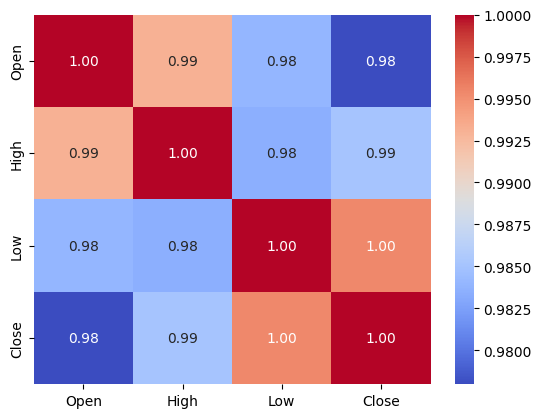

In [29]:
# Correlation Heatmap visualization code
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

High Correlation:
Open, High, Low, and Close are strongly correlated.
Low/No Correlation:
Date and Daily Return have weak or negligible correlations with other features.
Negative Correlation:
 Daily Return has weak negative correlations with Open, High, and Low.

#### Chart - 15 - Pair Plot

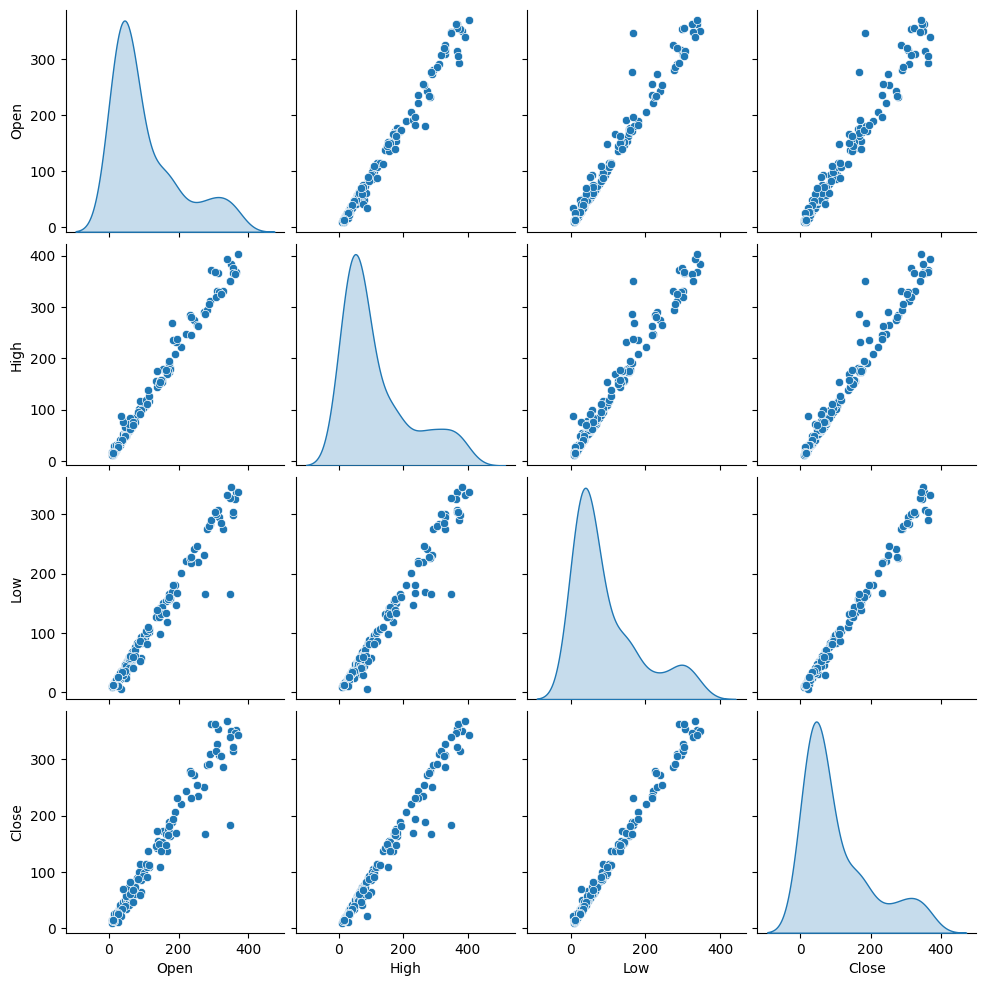

In [30]:
# Pair Plot visualization code
sns.pairplot(data, diag_kind="kde")
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Strong Linear Relationships: Open, High, Low, and Close show strong linear correlations, indicating they move together.
Skewed Distributions: The distributions of these features are skewed, suggesting non-normality and potential outliers.
Clustered Data Points: Data points are tightly clustered along lines in scatter plots, reinforcing strong positive correlations.
These insights highlight the interdependence of Open, High, Low, and Close, aiding in feature selection and understanding the dataset's structure for predictive modeling.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# check missing value
data.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values ​​in the data set

### 2. Handling Outliers

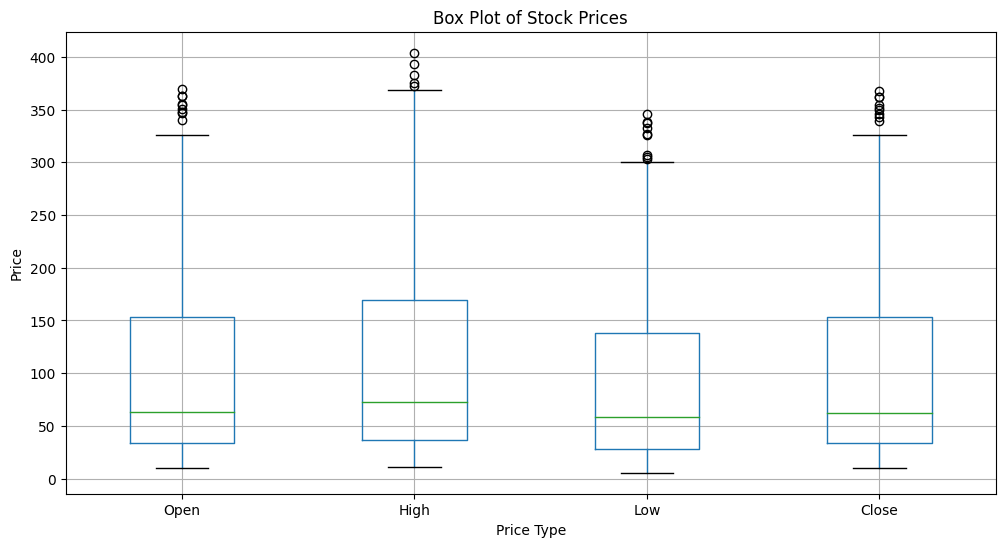

In [35]:
# visualize Outliers
plt.figure(figsize=(12, 6))
data[['Open', 'High', 'Low', 'Close']].boxplot()
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Box Plot of Stock Prices')
plt.grid(True)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

This outlier is significant for this data set

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [37]:
# Expand Contraction

#### 2. Lower Casing

In [38]:
# Lower Casing

#### 3. Removing Punctuations

In [39]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [41]:
# Remove Stopwords

In [42]:
# Remove White spaces

#### 6. Rephrase Text

In [43]:
# Rephrase Text

#### 7. Tokenization

In [44]:
# Tokenization

#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [46]:
# POS Taging

#### 10. Text Vectorization

In [47]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

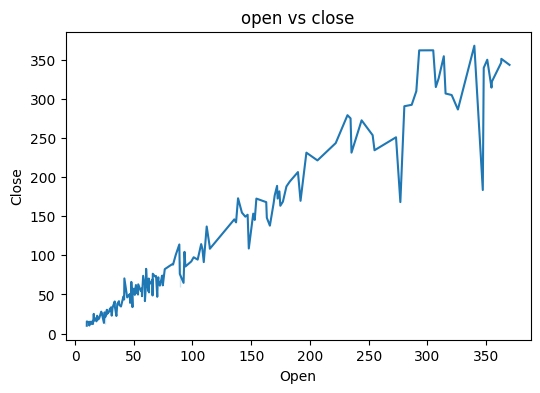

In [49]:
# Select your features wisely to avoid overfitting
#  lineplot for Constant Feature vs Target
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='Open', y='Close')
plt.title("open vs close")
plt.show()

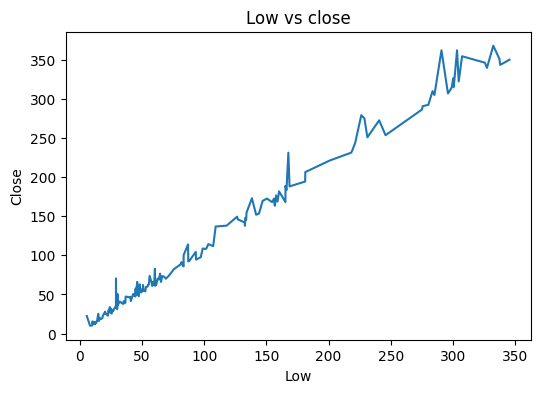

In [50]:
# lineplot for Constant Feature vs Target
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='Low', y='Close')
plt.title("Low vs close")
plt.show()

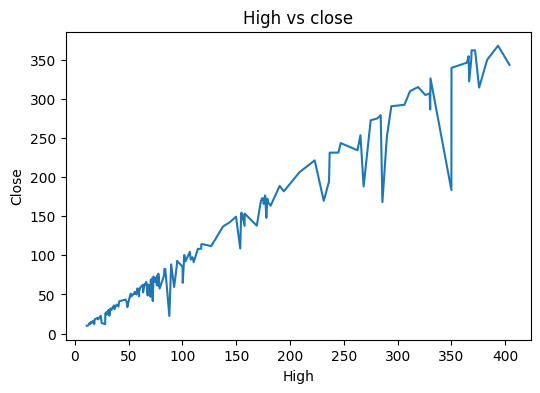

In [51]:
#  lineplot for Constant Feature vs Target
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='High', y='Close')
plt.title("High vs close")
plt.show()

In [52]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(Dataframe):
    vif_data = pd.DataFrame() # Changed DateFrame to DataFrame
    vif_data["feature"] = Dataframe.columns # Changed data to Dataframe
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(Dataframe.values, i) for i in range(len(Dataframe.columns))]
    return vif_data

vif_sample_df = calculate_vif(data)

vif_sample_df

,feature,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


##### What all feature selection methods have you used  and why?

we have used  variance inflation factor

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [53]:
# Transform Your data


### 6. Data Scaling

In [54]:
# Scaling your data
# Min-Max Scaling
min_max_scaler = MinMaxScaler(feature_range=(0,1))
data_min_max_scaled = min_max_scaler.fit_transform(data)
print(data_min_max_scaled)

[[8.33449090e-03 7.02719218e-03 1.67671716e-02 6.92892266e-03]
 [7.16766218e-03 9.26774621e-03 2.05912634e-02 9.61108628e-03]
 [9.66800945e-03 9.24228537e-03 1.97676129e-02 9.27581582e-03]
 [8.89012363e-03 8.22385172e-03 2.01500221e-02 8.40970049e-03]
 [9.30684817e-03 6.72166208e-03 2.15619944e-02 9.58314707e-03]
 [9.69579108e-03 8.14746919e-03 2.19149875e-02 1.04213232e-02]
 [1.02236422e-02 1.50728180e-02 2.36211208e-02 1.49474743e-02]
 [1.52799000e-02 1.45890620e-02 2.89748492e-02 1.71546714e-02]
 [1.72246145e-02 2.47224768e-02 3.07986469e-02 2.82185963e-02]
 [2.93374080e-02 2.43405642e-02 3.66818650e-02 2.65701833e-02]
 [2.72260036e-02 2.68866483e-02 3.01514929e-02 2.24910595e-02]
 [2.27809418e-02 1.82299623e-02 2.30916311e-02 1.57577112e-02]
 [1.66689818e-02 1.51746614e-02 2.43271069e-02 1.72664283e-02]
 [1.63911654e-02 1.87391791e-02 2.98573320e-02 2.19602146e-02]
 [2.22253091e-02 1.94520827e-02 3.30931019e-02 2.36924452e-02]
 [2.43922767e-02 3.29972502e-02 3.80938373e-02 3.576218

##### Which method have you used to scale you data and why?

I have used min-max scaling for the data Min-max scaling is giving values ​​between specific limits

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# select the feature and target varible
x = data[['Open', 'High','Low']]  # Features
y = data['Close']  # Target variable

In [ ]:
#split the data into train and test
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
train = data['Close'].iloc[:-30]  # All data except the last 30 observations
test = data['Close'].iloc[-30:]  # Last 30 observations for testing

##### What data splitting ratio have you used and why?

We took the last 30 data points for the test and the remainder for training.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Applying ARIMA model (choosing a simple (1,1,1) order for demonstration)
arima_model = ARIMA(train)
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=10)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

In [ ]:
# Predict the same number of steps as the length of the test data
arima_forecast = arima_result.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate ARIMA model
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(arima_mae)
print(arima_rmse)

89.64386823561773
108.50217951940964


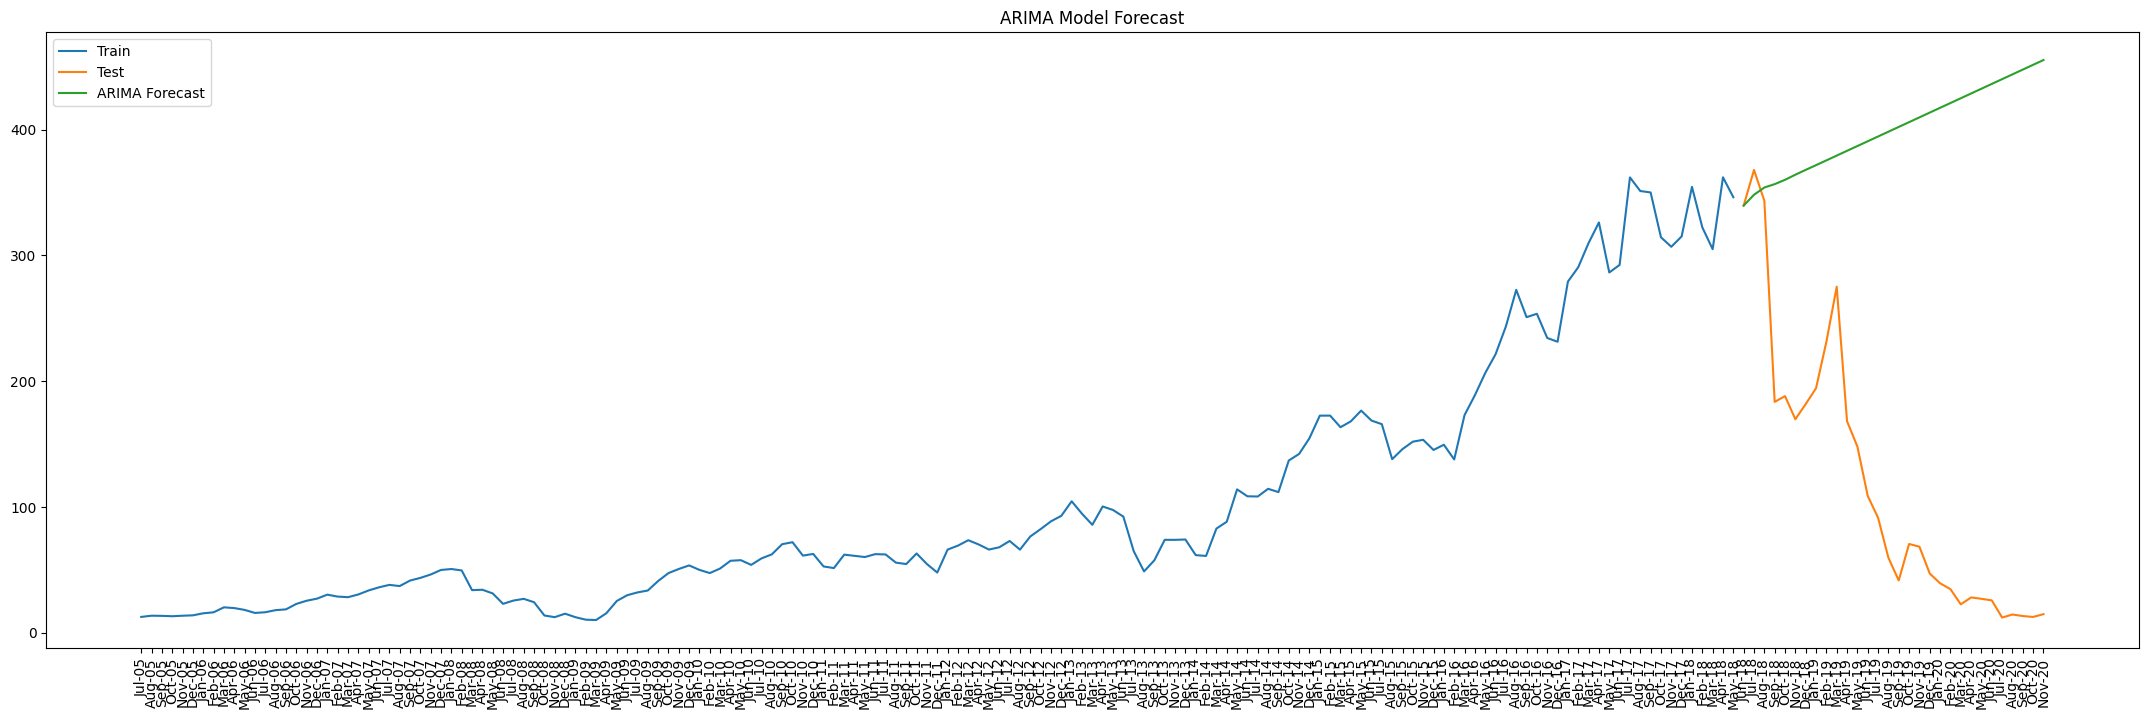

In [ ]:

# Plot the results
plt.figure(figsize=(27, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xticks(rotation=90)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

# Define the p, d, q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Find the best ARIMA model parameters
best_aic = np.inf
best_order = None
best_mdl = None

for param in pdq:
    try:
        tmp_mdl = ARIMA(train, order=param).fit()
        tmp_aic = tmp_mdl.aic
        if tmp_aic < best_aic:
            best_aic = tmp_aic
            best_order = param
            best_mdl = tmp_mdl
    except:
        continue

print(f'Best ARIMA order: {best_order}')
print(f'Best AIC: {best_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

Best ARIMA order: (2, 2, 1)
Best AIC: 1242.9600316876958


In [ ]:
print(f'Best ARIMA order: {best_order}')
print(f'Best AIC: {best_aic}')

Best ARIMA order: (2, 2, 1)
Best AIC: 1242.9600316876958


In [ ]:
# Applying ARIMA model (choosing a simple (1,1,1) order for demonstration)
arima_model = ARIMA(train,order=(2, 2, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

In [ ]:
# Predict the same number of steps as the length of the test data
arima_forecast = arima_result.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f'ARIMA MAE: {arima_mae}')
print(f'ARIMA RMSE: {arima_rmse}')

ARIMA MAE: 284.02107510772095
ARIMA RMSE: 314.6852981829681


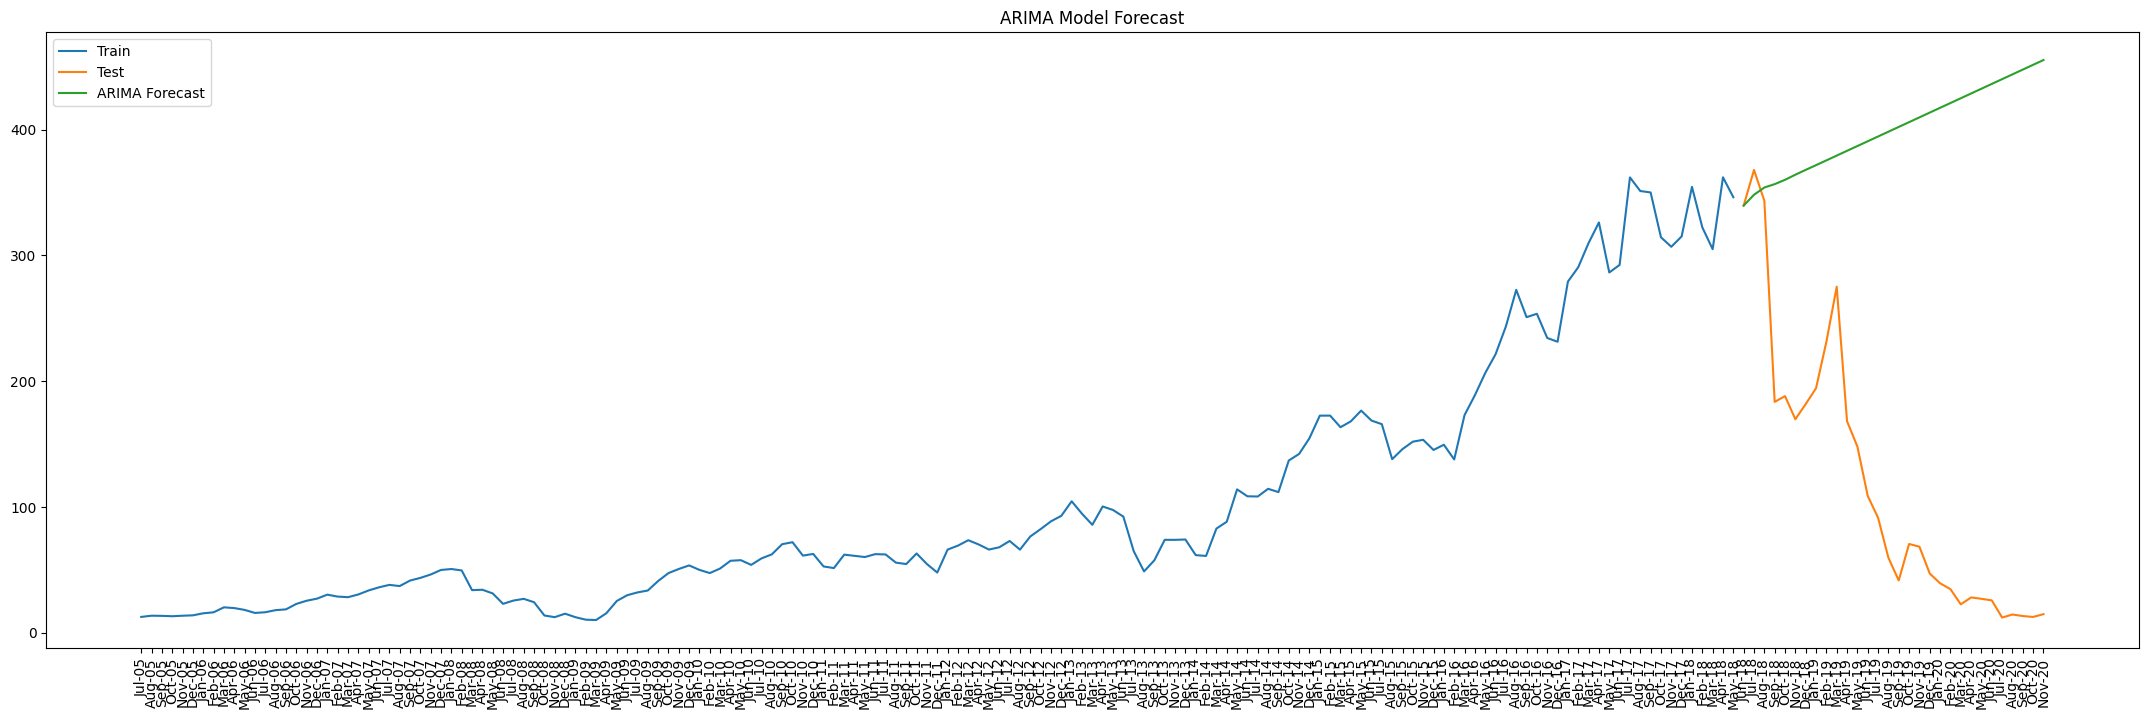

In [ ]:
# Plot the results
plt.figure(figsize=(27, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xticks(rotation=90)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I have hyperparameters p d q for this model, give me the best ordering of p d q for ARIMA model


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

In [ ]:
# Forecast
sarima_forecast = sarima_model_fit.get_forecast(steps=len(test))
sarima_forecast_values = sarima_forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(sarima_forecast_values)

155    356.029092
156    400.358297
157    410.801801
158    398.933974
159    383.897300
160    370.321453
161    372.025582
162    416.342089
163    407.956311
164    410.964904
165    445.468607
166    416.590736
167    424.201095
168    482.520892
169    481.194658
170    475.285207
171    448.854129
172    438.635261
173    443.908873
174    485.546856
175    464.031208
176    455.853273
177    502.805917
178    481.111232
179    489.932264
180    540.560395
181    545.705001
182    536.521995
183    516.357458
184    504.294944
Name: predicted_mean, dtype: float64


In [ ]:
sarima_mae = mean_absolute_error(test, sarima_forecast_values)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast_values))

print(f'SARIMA MAE: {sarima_mae}')
print(f'SARIMA RMSE: {sarima_rmse}')

SARIMA MAE: 332.896693427095
SARIMA RMSE: 366.06769203272273


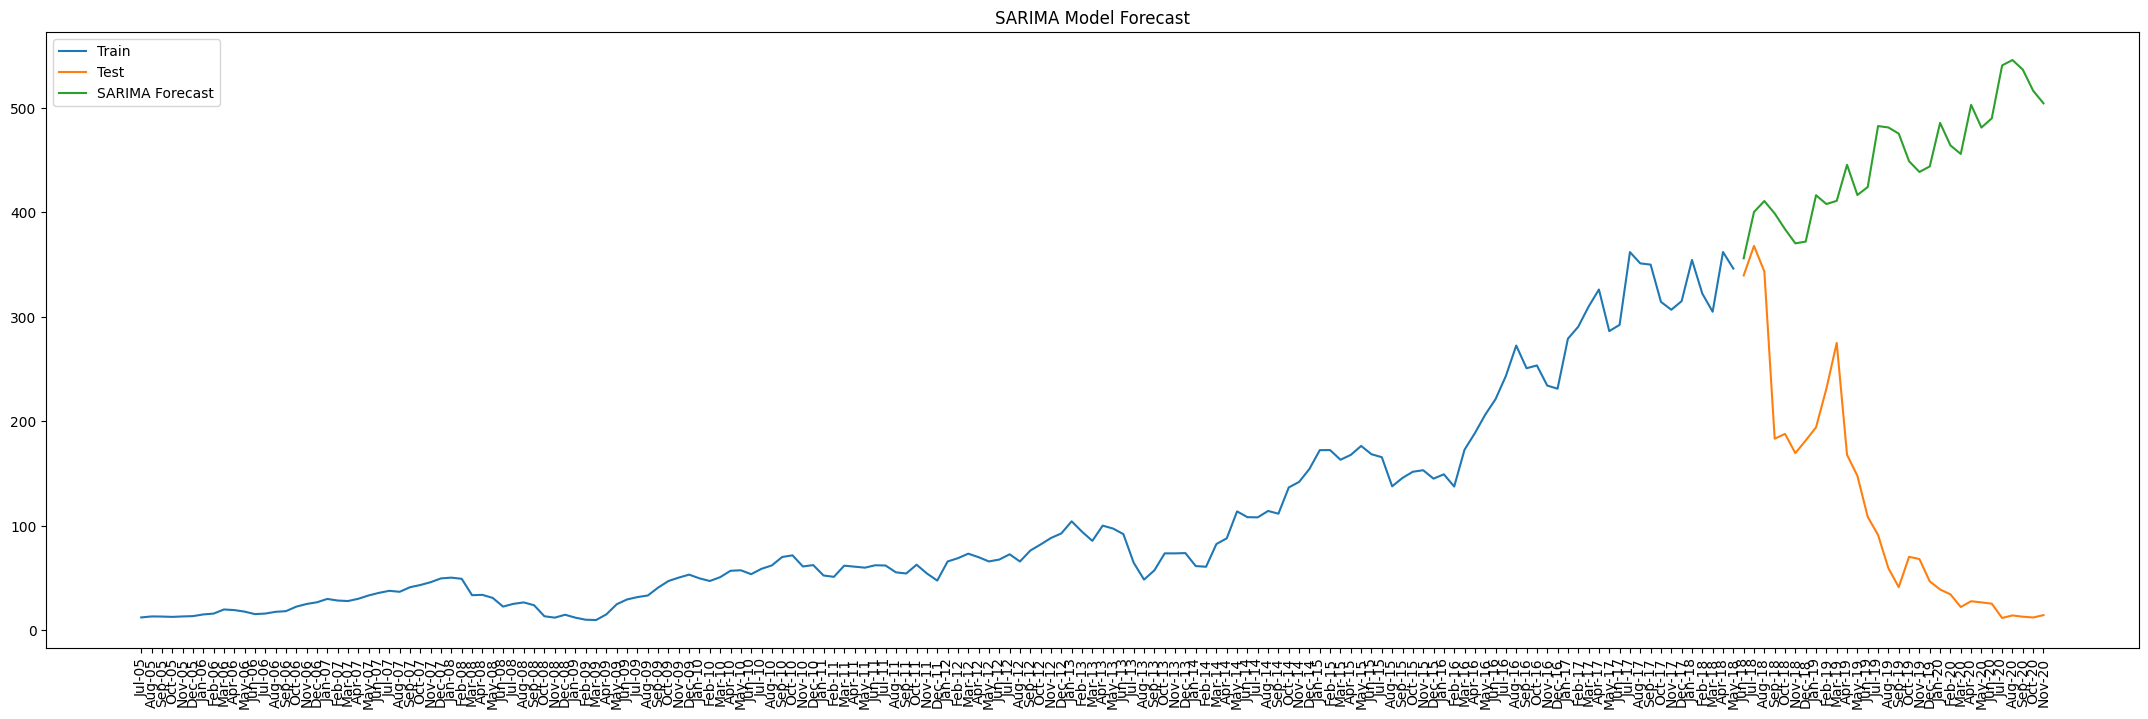

In [ ]:
# Plot the results
plt.figure(figsize=(27, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast_values, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.xticks(rotation=90)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the p, d, q, P, D, Q parameters to take any value between 0 and 3
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = [12]  # Seasonality is fixed to 12 (monthly data)

# Generate all different combinations of p, d, q, P, D, Q, s triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

best_aic = np.inf
best_order = None
best_seasonal_order = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = SARIMAX(train, order=param, seasonal_order=param_seasonal).fit(disp=False)
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = param
                best_seasonal_order = param_seasonal
                best_mdl = tmp_mdl
        except:
            continue


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

In [ ]:
print(f'Best SARIMA order: {best_order}')
print(f'Best Seasonal order: {best_seasonal_order}')
print(f'Best AIC: {best_aic}')

Best SARIMA order: (1, 1, 1)
Best Seasonal order: (1, 1, 0, 12)
Best AIC: 1166.20390749489


In [ ]:
# Fit the best SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_model_fit.get_forecast(steps=len(test))
sarima_forecast_values = sarima_forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

In [ ]:
# Evaluate SARIMA model
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast_values))
print(f'SARIMA RMSE: {sarima_rmse}')

SARIMA RMSE: 366.0833373914


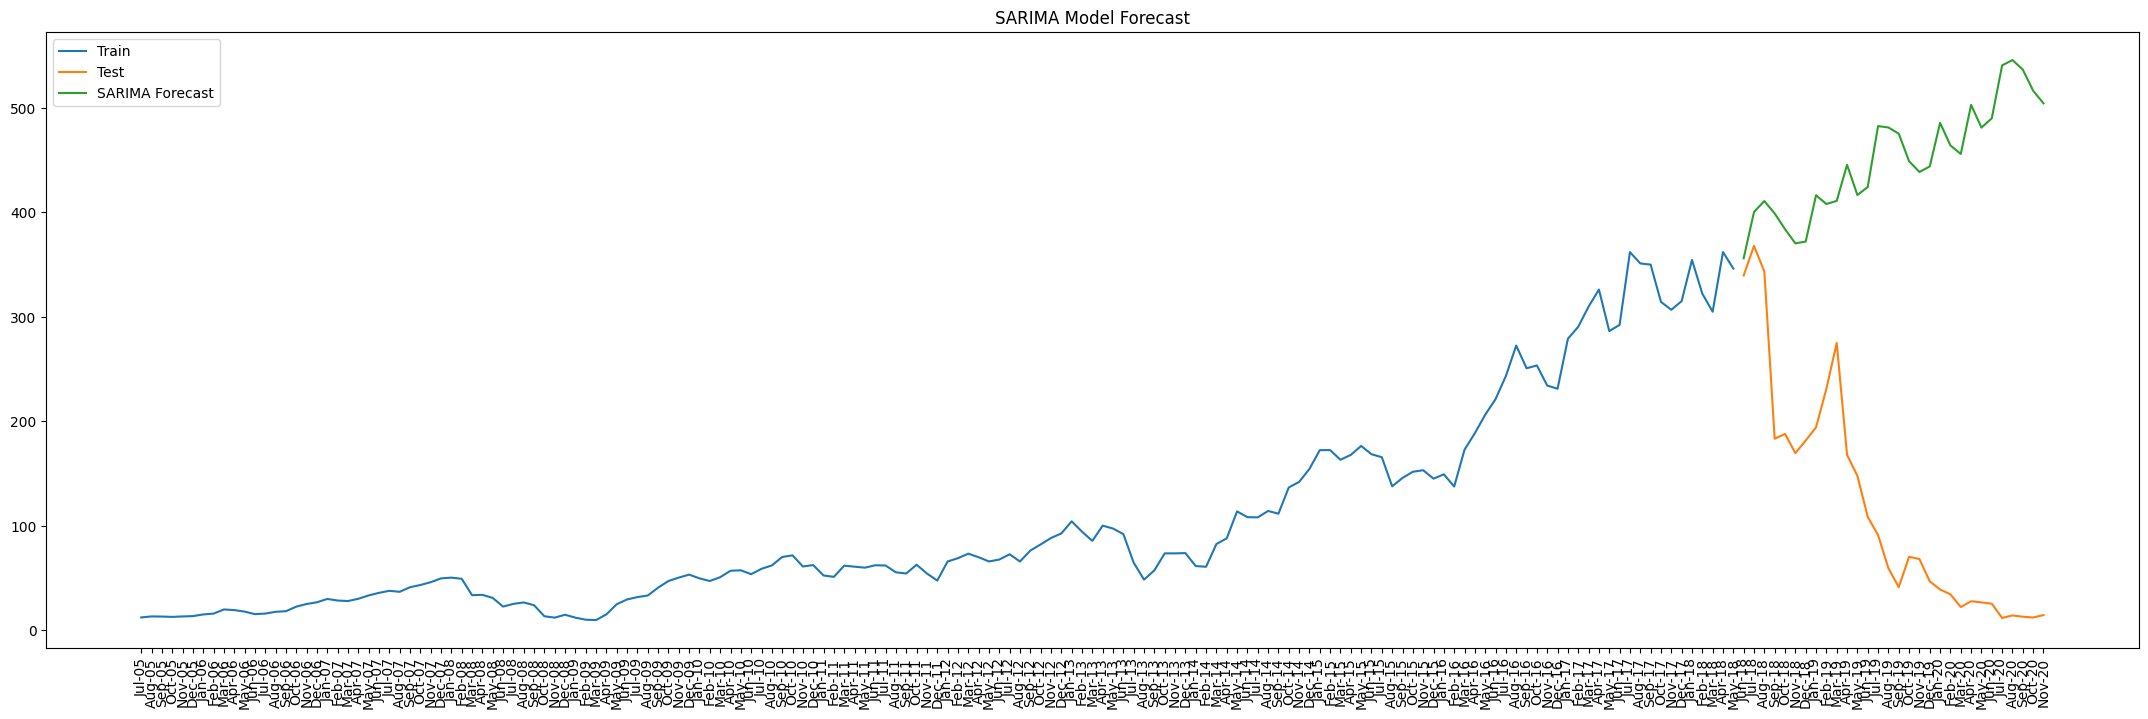

In [ ]:
# Plot the results for SARIMA
plt.figure(figsize=(27, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast_values, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.xticks(rotation=90)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have hyperparameters p d q and seasonal for this model, give me the best ordering of p d q and seasonal for SARIMA model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 Root Mean Squared Error (RMSE)

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The sarimsa model got some great results

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

There are no missing values ​​in this data set and whatever outliers there are, we consider them as predictions.We have taken evaluation metrics like Root mean square error(RMSE), Mean square error and to predict the data we have used ARIMA and SARIMA model, we have observed that SARIMA worked better than ARIMA so we will consider SARIMA model for our data set

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***